In [25]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df_db = pd.read_csv("pima_indians_diabetes.csv",skiprows=3, header=5)


In [27]:
col = df_db.columns
temp = col[-1]
temp = list(temp)
temp = temp[3:-1]
temp = ("").join(ele for ele in temp)

col = col.delete(-1)
col = list(col)
col.append(temp)
df_db.columns = col
df_db.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (Years)', 'Class variable (0 or 1)'],
      dtype='object')

In [28]:
df_db.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (Years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
missing_val = pd.DataFrame(df_db.isnull().sum())

In [30]:
missing_val.sort_values(by=0,axis = 0,ascending=False)

,0
Number of times pregnant,0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0
Diastolic blood pressure (mm Hg),0
Triceps skin fold thickness (mm),0
2-Hour serum insulin (mu U/ml),0
Body mass index (weight in kg/(height in m)^2),0
Diabetes pedigree function,0
Age (Years),0
Class variable (0 or 1),0


In [31]:
df_db_corr = df_db.corr()

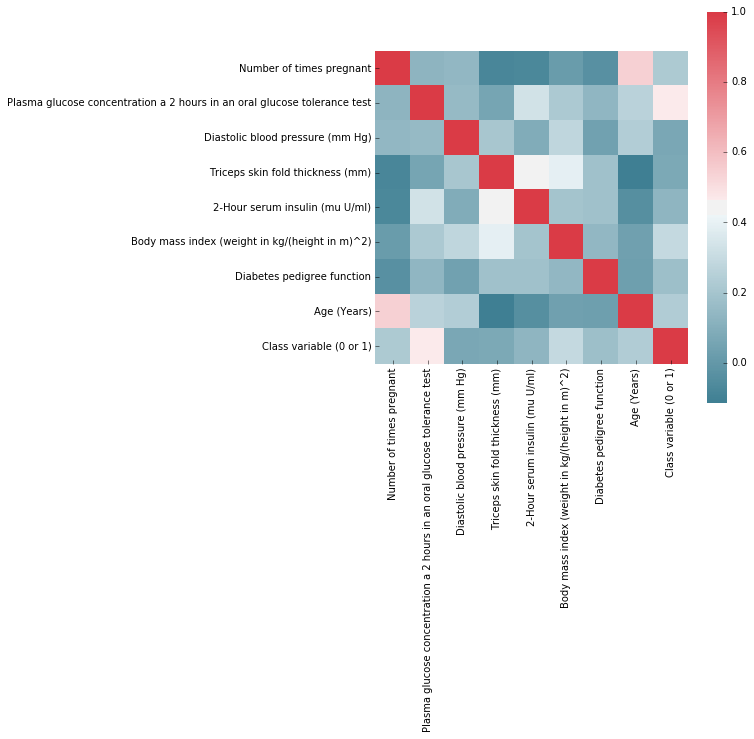

In [32]:
#Set the width and height of the plot

f,ax = plt.subplots(figsize=(7,7))

sbn.heatmap(df_db_corr,mask=np.zeros_like(df_db_corr, dtype=np.bool),
            cmap=sbn.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)

In [33]:
df_db_corr.loc['Number of times pregnant',['Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function']]

Triceps skin fold thickness (mm)                 -0.081672
2-Hour serum insulin (mu U/ml)                   -0.073535
Body mass index (weight in kg/(height in m)^2)    0.017683
Diabetes pedigree function                       -0.033523
Name: Number of times pregnant, dtype: float64

TypeError: 'AxesSubplot' object is not iterable

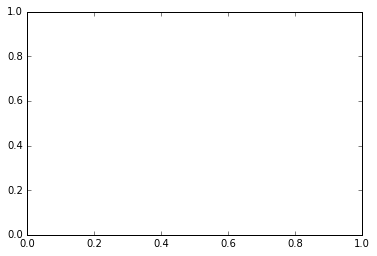

In [34]:
#Plotting
# Getting the values and plotting it
f1 = df_db['2-Hour serum insulin (mu U/ml)'].values
f2 = df_db['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].values

f, ax = plt.subplot(111)
plt.scatter(f1, f2, c = 'k')
ax.xaxis('')
ax.yaxis('')

In [35]:
len(df_db)

768

In [36]:
#Importing the packages for Linear Regression and Splitting the data
from sklearn.linear_model import LogisticRegression as Lr
from sklearn.model_selection import train_test_split

#Defining the Predictors and the independent variables
X = df_db.iloc[:,:-1]
y = df_db.iloc[:,-1]

#Split the data into 80% train and rest test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Create a Linear Regression Object
lr = Lr()

#Fit the model on training data
model = lr.fit(X_train,Y_train)

#Predit the Output using the test set
prediction = model.predict(X_test)

prediction
#Evaluate the Model


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [37]:
Error = (prediction - Y_test)

In [39]:
(len(Error[Error==0])/len(Error)) * 100  #The number of observations with no error

75.97402597402598

In [43]:
# % Accuracy
accuracy = 1-(len(Error[Error==1]) + len(Error[Error==-1])/len(prediction))
accuracy

-15.136363636363637

In [24]:
len(Error[Error!=0])

37